In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\nisho\Documents\nishoak docs\Studies\Deep Learning\ANN\01_churn_modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
# We do not require features like row number, customerID, Surname (lets not consider those)
X = df.iloc[ : , 3:13]
y = df.iloc[ : , -1]

In [5]:
print (df['Geography'].unique())
print (df['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [6]:
# Geography, Gender are categorical columns --> Encode those 2 features
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
X=pd.concat([X,geography,gender],axis=1) # axis = 1 basically refers to columns

In [8]:
X=X.drop(['Geography','Gender'],axis=1)

In [9]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
X.shape

(10000, 11)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
# Feature Scaling - In deep learning also we need feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### ANN

In [13]:
# Importing keras libraries and packages 
import keras

In [14]:
from keras.models import Sequential # Every neural network we create (ANN,CNN or RNN) needs sequential library
from keras.layers import Dense # To create hidden layers
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout # Droupout is a regularization parameter, used whenever the neural networks are deep

In [15]:
# intializing the sequential library
classifier = Sequential()

In [16]:
# Adding the input layer and the first hidden layer 
classifier.add(Dense( units= 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11)) 
# units= 6 --> hidden layer contains 6 neurons
# kernel_initializer = 'he_uniform'--> Weight initialization parameter ( he uniform works well with relu A.F)
# input_dim = 11 basically indicates how many input features are connected to this hidden layer 

##### After executing the previous now we are with a neural network where input layer has 11 features and second layer is having 6 hidden neurons

In [17]:
# Adding another hidden layer
classifier.add(Dense( units = 6, kernel_initializer = 'he_uniform' , activation = 'relu'))

In [18]:
# Adding the output layer
classifier.add(Dense( units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid' ))

In [19]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compiling the ANN
# We have to mention optimizer we are going to use, loss function we are going to use, metrics we require
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
# Fitting the training set in the ANN
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.5440 - accuracy: 0.7787 - val_loss: 0.5142 - val_accuracy: 0.7952
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5067 - accuracy: 0.7962 - val_loss: 0.4963 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4913 - accuracy: 0.7962 - val_loss: 0.4861 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4802 - accuracy: 0.7962 - val_loss: 0.4782 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4712 - accuracy: 0.7962 - val_loss: 0.4714 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4634 - accuracy: 0.7962 - val_loss: 0.4657 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4567 - accuracy: 0.7962 - val_loss: 0.4608 - val_accuracy: 0.7955

In [22]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)    

63/63 [==============================] - 0s 1ms/step


In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [24]:
cm

array([[1502,   93],
       [ 201,  204]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

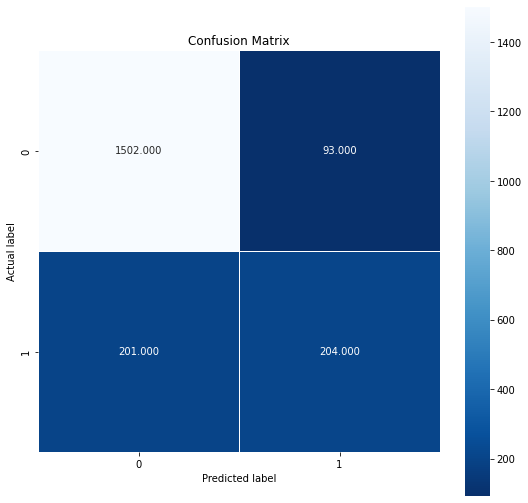

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

In [26]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.853

In [27]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


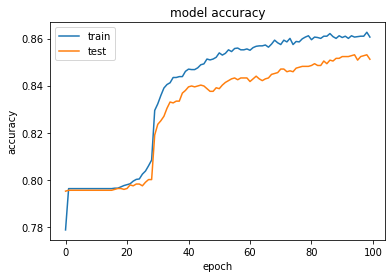

In [28]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

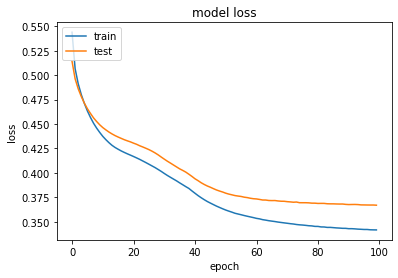

In [29]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()